In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv(r'C:\Users\chithra\Desktop\DATASCIENCE\Machine Learning\Demo_Datasets\Demo Datasets\Lesson 4\Advertising.csv', index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.columns


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='TV'>

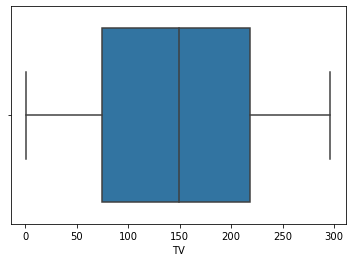

In [9]:
sns.boxplot(x=data['TV'])

<AxesSubplot:xlabel='radio'>

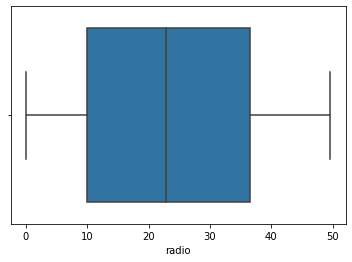

In [10]:
sns.boxplot(x=data['radio'])

<AxesSubplot:xlabel='newspaper'>

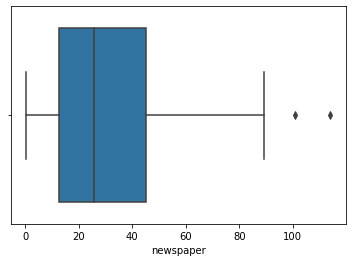

In [11]:
sns.boxplot(x=data['newspaper'])

In [12]:
Q1=data['newspaper'].quantile(.25)
Q3=data['newspaper'].quantile(.75)

In [13]:
IQR = Q3-Q1

In [14]:
print(IQR)

32.35


In [15]:
data_outlier = data[((data['newspaper']<(Q1 - 1.5 * IQR)) | (data['newspaper']>(Q3 + 1.5* IQR)))]

In [16]:
data_outlier_removed = data[~((data['newspaper'] < (Q1 - 1.5 * IQR)) |(data['newspaper'] > (Q3 + 1.5 * IQR)))]

In [17]:
data_clean = data_outlier_removed

<AxesSubplot:xlabel='newspaper'>

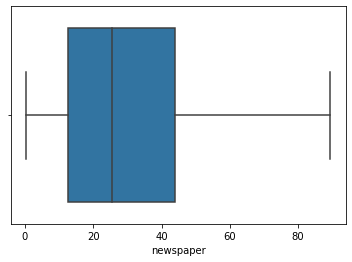

In [18]:
sns.boxplot(x=data_clean['newspaper'])

In [19]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [21]:
x=data_clean[['TV','radio','newspaper']]
y=data_clean['sales']

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=6)

In [23]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [24]:
print(lm.intercept_)
print(lm.coef_)

3.066827783277583
[ 4.39602225e-02  1.91402445e-01 -1.04839643e-06]


In [25]:
prediction = lm.predict(xtest)
prediction

array([12.72911964, 13.0819212 , 14.2985458 ,  8.80760052, 10.46777849,
        6.98207185,  6.57849522, 17.09874205, 20.30559716, 16.21302984,
       24.59894915, 19.93669585, 17.96953213, 21.08256107, 10.83123782,
       19.14121933, 13.06727083,  8.14574424, 15.65529495, 16.99168372,
       12.44339155, 15.10084278, 13.37326714, 10.67712765,  6.27122911,
       10.56122221, 16.55321832, 20.682605  , 14.11666698, 21.26573394,
       11.36029899, 11.87251615, 20.127552  , 20.41701487, 16.22376958,
       13.66655958, 20.71090314, 18.00995408, 12.6082432 ,  7.88012494,
       15.46211545,  7.77561947, 23.01671274,  5.80148214, 19.59763849,
       23.89837401,  9.8462417 ,  7.48508798,  9.9085479 , 17.59357826,
       23.18323304,  9.99374419, 14.11431824,  6.62835509, 14.56248685,
       12.80878266, 14.81329113, 17.3176244 , 10.26246811, 10.44863629])

In [26]:
print(r2_score(ytest, prediction))

0.8796613306000015


In [27]:
print(mean_squared_error(ytest,prediction))

3.7305388642897532


In [28]:
# for feauture selection analysis and evaluationg the model,we need this
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data_clean).fit()
lm.conf_int(alpha=0.05)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           8.35e-95
Time:                        13:42:01   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
radio          0.1886      0.009     21.772      0.000       0.171       0.206
newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
lm = smf.ols(formula='sales ~ TV + radio ', data=data_clean).fit()
lm.rsquared


0.8953728420315046

In [31]:
# pvalue of newspaper is greater than 0.05,so that is not significant..so we can build model without newspaper.
x_new=data_clean[['TV','radio']]
y=data_clean['sales']

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.3,random_state=6)

In [36]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [37]:
prediction = lm.predict(xtest)

In [38]:
print(r2_score(ytest, prediction))

0.8796612325098099


In [39]:
print(mean_squared_error(ytest,prediction))

3.7305419051183915
